# Library Circulation Data

In [88]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

loans = pd.read_csv('data/Number Loans in BB by date loaned for 2022.csv').rename(columns={
    'Loan Date': 'date',
    'Loans (Not In House)': 'n_loans',
    'Permanent LC Classification Code': 'lcc',
    'Patron Group': 'patron',
}).drop(columns='Library Name')
loans

,date,patron,n_loans,lcc
0,2022-01-02,Faculty,2,E
1,2022-01-02,Faculty,1,HB
2,2022-01-02,Faculty,1,PG
3,2022-01-02,Faculty,3,PS
4,2022-01-02,Faculty,1,Q
...,...,...,...,...
13422,2022-12-21,Internal Library Account,1,GN
13423,2022-12-21,Non-Dartmouth,3,PS
13424,2022-12-21,Staff,1,F
13425,2022-12-21,Staff,19,M


In [150]:
n_loans = loans.groupby(['date', 'patron']).n_loans.sum().reset_index(1)
n_loans = n_loans.pivot(columns=['patron']).fillna(0)
n_loans.columns = n_loans.columns.droplevel(0)
n_loans_normalized = n_loans[['Faculty', 'Graduate', 'Undergraduate']].div(n_loans[['Faculty', 'Graduate', 'Undergraduate']].sum(axis=1), axis=0)

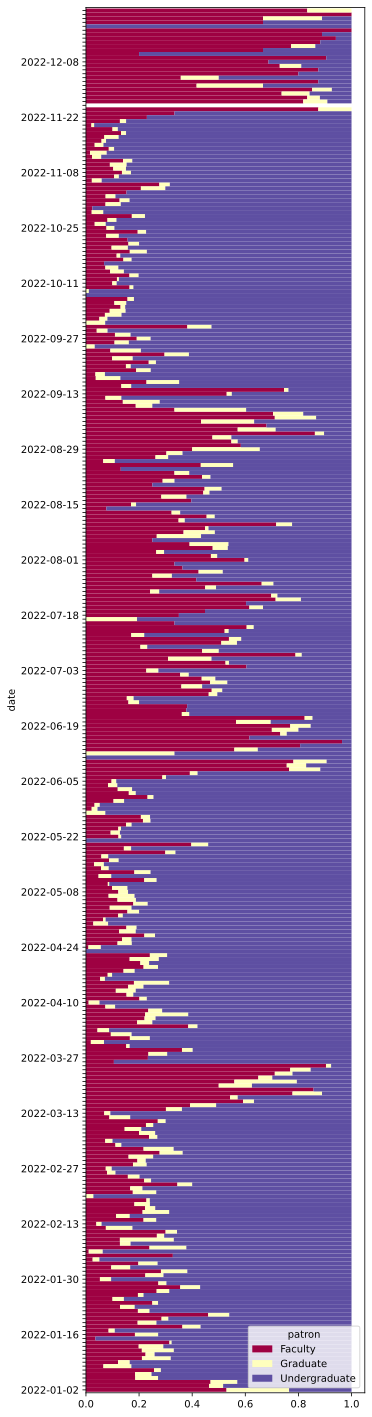

In [177]:
ax = n_loans_normalized[['Faculty', 'Graduate', 'Undergraduate']].plot(kind='barh', stacked=True, figsize=(5, 25), width=1.0, colormap='Spectral')
for index, label in enumerate(ax.get_yticklabels()):
   if index % 14 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
   
plt.savefig('out/loans-normalized-patron.png', bbox_inches='tight')


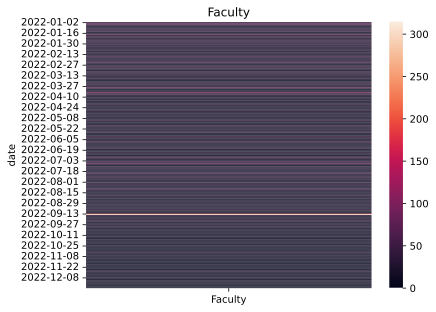

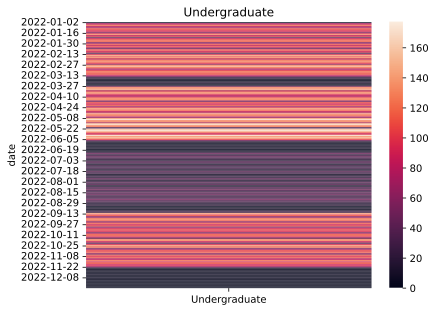

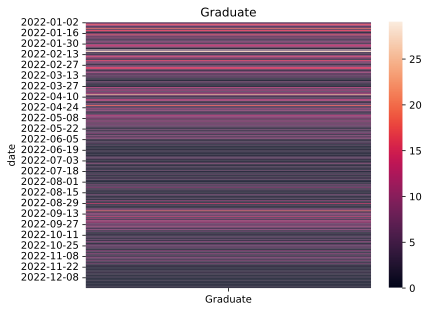

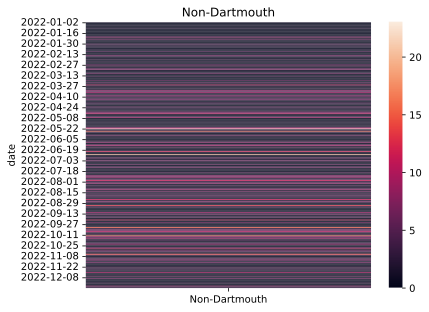

In [198]:
for patron in ['Faculty', 'Undergraduate', 'Graduate', 'Non-Dartmouth']:
    sns.heatmap(n_loans[patron].to_frame())
    plt.title(patron)
    plt.savefig(f'out/loans-heatmap-{patron}.png', bbox_inches='tight')
    plt.show()
    
